In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import jaccard
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr, ranksums, ttest_ind

In [2]:
path = 'C:/Users/Paola/Documents/HC/'

In [2]:
path = ''

In [3]:
ids = pd.read_excel(path+'IDs_HC.xlsx')

In [4]:
preterm_ids = np.where(ids['PRETERM(1)'] == 1)[0]
term_ids = np.where(ids['PRETERM(1)'] == 0)[0]

In [5]:
neonatal_mats = sio.loadmat(path+'ST_bin_neonates.mat')['ST_bin']
prem_mats = neonatal_mats[:,:,preterm_ids]
term_mats = neonatal_mats[:,:,term_ids]

In [6]:
hcp_mats = sio.loadmat(path+'ST_HCP94_bin.mat')['ST_bin']

In [7]:
parcels = pd.read_csv(path+'labels_84.txt', sep="\s+")
parcels.set_index('index',inplace=True)

### Tiers ABC

 adult thresholds are now:
Tier C: 1-12
Tier B: 13-45
Tier A: 46-max

and for neonates:
Tier C: 0-18
Tier B: 19-36
Tier A: 37-max

Tier 1: 37-max
Tier 2: 29-36
Tier 3: 19-28
Tier 4: 0-18

In [20]:
node_degrees = np.array([hcp_mats[:,:,i].sum(axis=1) for i in range(hcp_mats.shape[2])])
node_degrees[node_degrees<13] = 3
node_degrees[np.logical_and(node_degrees>12,node_degrees< 46)] = 2
node_degrees[node_degrees>45] = 1
mytiers = np.zeros((84,3))
for i in range(84):
    uniq, cnt = np.unique(node_degrees[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_hcp = np.zeros([84,])
[r,c] = np.where(mytiers>=94/3*2)
rois_hcp[r] = c+1

In [21]:
node_degrees_term = np.array([term_mats[:,:,i].sum(axis=1) for i in range(term_mats.shape[2])])
node_degrees_term[node_degrees_term<19] = 3
node_degrees_term[np.logical_and(node_degrees_term>18,node_degrees_term<37)] = 2
node_degrees_term[node_degrees_term>36] = 1
mytiers = np.zeros((84,3))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_term[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_term = np.zeros([84,])
[r,c] = np.where(mytiers>=59/3*2)
rois_term[r] = c+1

In [22]:
node_degrees_prem = np.array([prem_mats[:,:,i].sum(axis=1) for i in range(prem_mats.shape[2])])
node_degrees_prem[node_degrees_prem<19] = 3
node_degrees_prem[np.logical_and(node_degrees_prem>18,node_degrees_prem<37)] = 2
node_degrees_prem[node_degrees_prem>36] = 1
mytiers = np.zeros((84,3))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_prem[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_prem = np.zeros([84,])
[r,c] = np.where(mytiers>=77/3*2)
rois_prem[r] = c+1

In [23]:
tiers_2thirds = np.vstack([rois_prem,rois_term,rois_hcp]).T

In [14]:
np.savetxt('tiers_neonates_94hcp_ABC.txt',tiers_2thirds,fmt='%d')

In [12]:
preterm = {1:[],2:[],3:[],0:[]}
term = {1:[],2:[],3:[],0:[]}
hcp = {1:[],2:[],3:[],0:[]}
for i in range(len(tiers_2thirds)):
    preterm[tiers_2thirds[i,0]].append(parcels['long'][i+1])
    term[tiers_2thirds[i,1]].append(parcels['long'][i+1])
    hcp[tiers_2thirds[i,2]].append(parcels['long'][i+1])

In [13]:
roi_by_tiers = pd.DataFrame([preterm,term,hcp],index=['preterm','term','hcp'])
roi_by_tiers.to_csv(path+'rois_by_tiers_ABC.csv')

### Tiers 1234

The 4 tiers for adults are:
Tier 4: 1-12
Tier 3: 13-28
Tier 2: 29-45
Tier 1: 46-max

In [17]:
node_degrees = np.array([hcp_mats[:,:,i].sum(axis=1) for i in range(hcp_mats.shape[2])])
node_degrees[node_degrees<13] = 4
node_degrees[np.logical_and(node_degrees>12,node_degrees< 29)] = 3
node_degrees[np.logical_and(node_degrees>28,node_degrees< 46)] = 2
node_degrees[node_degrees>45] = 1
mytiers = np.zeros((84,4))
for i in range(84):
    uniq, cnt = np.unique(node_degrees[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_hcp = np.zeros([84,])
[r,c] = np.where(mytiers>=94/3*2)
rois_hcp[r] = c+1

Tier 1: 37-max
Tier 2: 29-36
Tier 3: 19-28
Tier 4: 0-18

term

In [19]:
node_degrees_term = np.array([term_mats[:,:,i].sum(axis=1) for i in range(term_mats.shape[2])])
node_degrees_term[node_degrees_term<19] = 4
node_degrees_term[np.logical_and(node_degrees_term>18,node_degrees_term<29)] = 3
node_degrees_term[np.logical_and(node_degrees_term>28,node_degrees_term<37)] = 2
node_degrees_term[node_degrees_term>36] = 1
mytiers = np.zeros((84,4))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_term[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_term = np.zeros([84,])
[r,c] = np.where(mytiers>=59/3*2)
rois_term[r] = c+1

preterm

In [20]:
node_degrees_prem = np.array([prem_mats[:,:,i].sum(axis=1) for i in range(prem_mats.shape[2])])
node_degrees_prem[node_degrees_prem<19] = 4
node_degrees_prem[np.logical_and(node_degrees_prem>18,node_degrees_prem<29)] = 3
node_degrees_prem[np.logical_and(node_degrees_prem>28,node_degrees_prem<37)] = 2
node_degrees_prem[node_degrees_prem>36] = 1
mytiers = np.zeros((84,4))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_prem[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_prem = np.zeros([84,])
[r,c] = np.where(mytiers>=77/3*2)
rois_prem[r] = c+1

In [21]:
tiers_2thirds = np.vstack([rois_prem,rois_term,rois_hcp]).T

In [22]:
np.savetxt('tiers_neonates_94hcp_1234.txt',tiers_2thirds,fmt='%d')

In [23]:
preterm = {1:[],2:[],3:[],4:[],0:[]}
term = {1:[],2:[],3:[],4:[],0:[]}
hcp = {1:[],2:[],3:[],4:[],0:[]}
for i in range(len(tiers_2thirds)):
    preterm[tiers_2thirds[i,0]].append(parcels['long'][i+1])
    term[tiers_2thirds[i,1]].append(parcels['long'][i+1])
    hcp[tiers_2thirds[i,2]].append(parcels['long'][i+1])

In [24]:
roi_by_tiers = pd.DataFrame([preterm,term,hcp],index=['preterm','term','hcp'])
roi_by_tiers.to_csv(path+'rois_by_tiers_1234.csv')

In [25]:
for tier in [1,2,3,4]:
    print("Tier",tier)
    print('hcp - term', len(np.setdiff1d(hcp[tier],term[tier])))
    print(*np.setdiff1d(hcp[tier],term[tier]),sep=', ')
    print('hcp - preterm', len(np.setdiff1d(hcp[tier],preterm[tier])))
    print(*np.setdiff1d(hcp[tier],preterm[tier]),sep=', ')
    print('term - preterm', len(np.setdiff1d(term[tier],preterm[tier])))
    print(*np.setdiff1d(term[tier],preterm[tier]),sep=', ')
    print('preterm - term', len(np.setdiff1d(preterm[tier],term[tier])))
    print(*np.setdiff1d(preterm[tier],term[tier]),sep=', ')
    print('term - hcp', len(np.setdiff1d(term[tier],hcp[tier])))
    print(*np.setdiff1d(term[tier],hcp[tier]),sep=', ')
    print('preterm - hcp', len(np.setdiff1d(preterm[tier],hcp[tier])))
    print(*np.setdiff1d(preterm[tier],hcp[tier]),sep=', ')

Tier 1
hcp - term 4
ctx-lh-precuneus, ctx-lh-superiorparietal, ctx-rh-precuneus, ctx-rh-superiorparietal
hcp - preterm 4
ctx-lh-precuneus, ctx-lh-superiorparietal, ctx-rh-precuneus, ctx-rh-superiorparietal
term - preterm 0

preterm - term 0

term - hcp 3
Left-Putamen, Right-Putamen, Right-Thalamus
preterm - hcp 3
Left-Putamen, Right-Putamen, Right-Thalamus
Tier 2
hcp - term 7
Left-Hippocampus, Right-Hippocampus, ctx-lh-postcentral, ctx-lh-rostralmiddlefrontal, ctx-rh-inferiorparietal, ctx-rh-precentral, ctx-rh-rostralmiddlefrontal
hcp - preterm 3
Left-Hippocampus, Right-Hippocampus, ctx-lh-postcentral
term - preterm 0

preterm - term 5
ctx-lh-inferiortemporal, ctx-lh-rostralmiddlefrontal, ctx-rh-inferiorparietal, ctx-rh-precentral, ctx-rh-rostralmiddlefrontal
term - hcp 10
Left-Pallidum, Right-Pallidum, ctx-lh-lateralorbitofrontal, ctx-lh-middletemporal, ctx-lh-superiorparietal, ctx-lh-superiortemporal, ctx-rh-lateralorbitofrontal, ctx-rh-middletemporal, ctx-rh-superiorparietal, ctx-rh

### Symmetry analysis

In [26]:
parcels = pd.read_csv(path+'labels_84.txt', sep="\s+")
parcels.set_index('index',inplace=True)

In [36]:
parcels

short                            long    r    g    b  alpha  \
index                                                                 
0         ???                         Unknown    0    0    0      0   
1      L.BSTS                 ctx-lh-bankssts   25  100   40    255   
2      L.CACG  ctx-lh-caudalanteriorcingulate  125  100  160    255   
3      L.CMFG      ctx-lh-caudalmiddlefrontal  100   25    0    255   
4        L.CU                   ctx-lh-cuneus  220   20  100    255   
...       ...                             ...  ...  ...  ...    ...   
80       R.FP              ctx-rh-frontalpole  100    0  100    255   
81       R.TP             ctx-rh-temporalpole   70   70   70    255   
82      R.TTG       ctx-rh-transversetemporal  150  150  200    255   
83       R.IN                   ctx-rh-insula  255  192   32    255   
84      R.CER        RH_Cerebellar_hemisphere  230  148   34    255   

            class  
index              
0            None  
1          cortex  
2          cortex  
3          cortex  
4          cortex  
...           ...  
80         cortex  
81         cortex  
82         cortex  
83         cortex  
84     cerebellum  

[85 rows x 7 columns]

In [28]:
labels = np.array(parcels['short'][1:])

In [29]:
llabels = [el for el in parcels['short'] if 'L.' in el]
ordered_labels_L = np.hstack([llabels, [el.replace('L.','R.') for el in llabels]])
ordered_labels_R = np.hstack([[el.replace('L.','R.') for el in llabels],llabels])

In [30]:
ordered_rois = np.array([label.replace('L.','') for label in ordered_labels_L[:42]])

In [31]:
label_order_L = [np.where(parcels['short']==el)[0][0]-1 for el in ordered_labels_L] 
label_order_R = [np.where(parcels['short']==el)[0][0]-1 for el in ordered_labels_R] 

Symmetry score based on simple matching coefficient

In [45]:
n_adults = hcp_mats.shape[-1]
n_prem = prem_mats.shape[-1]
n_term = term_mats.shape[-1]
score_adults = np.zeros([84,n_adults])
score_prem = np.zeros([84,n_prem])
score_term = np.zeros([84,n_term])
tier_score_adults = np.zeros([3,n_adults])
tier_score_prem = np.zeros([3,n_prem])
tier_score_term = np.zeros([3,n_term])
n = 83

for iSub in range(n_adults):
    subMat = hcp_mats[:,:,iSub]
    for iParc in range(84):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])        
        if b == 0 or a == 0:
            score_adults[iParc,iSub] = np.nan
        else:
            normalization = (a*b/n + n - a - b + a*b/n)/n
            M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))
            M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                           np.logical_not(subMat[label_order_R[iParc],label_order_R])))
            score_adults[iParc,iSub] = (M11 + M00)/n/normalization
    
for iSub in range(n_prem):
    subMat = prem_mats[:,:,iSub]
    for iParc in range(84):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        if b == 0 or a == 0:
            score_prem[iParc,iSub] = np.nan
        else:
            normalization = (a*b/n + n - a - b + a*b/n)/n
            M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))
            M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                           np.logical_not(subMat[label_order_R[iParc],label_order_R])))
            score_prem[iParc,iSub] = (M11 + M00)/n/normalization

for iSub in range(n_term):
    subMat = term_mats[:,:,iSub]
    for iParc in range(42):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        if b == 0 or a == 0:
            score_term[iParc,iSub] = np.nan
        else:
            normalization = (a*b/n + n - a - b + a*b/n)/n
            M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))
            M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                           np.logical_not(subMat[label_order_R[iParc],label_order_R])))
            score_term[iParc,iSub] = (M11 + M00)/n/normalization

        
for tier in [1,2,3]:
    for iSub in range(n_adults):
        rois = np.where(node_degrees.T[:,iSub] == tier)[0]
        tier_score_adults[tier-1,iSub] = \
            np.nanmean(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} adults: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_adults[tier-1,:]),np.std(tier_score_adults[tier-1,:][~np.isnan(tier_score_adults[tier-1,:])])))
    for iSub in range(n_term):    
        rois = np.where(node_degrees_term.T[:,iSub] == tier)[0]
        tier_score_term[tier-1,iSub] = \
            np.nanmean(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} term: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_term[tier-1,:]),np.std(tier_score_term[tier-1,:][~np.isnan(tier_score_term[tier-1,:])])))
    for iSub in range(n_prem):    
        rois = np.where(node_degrees_prem.T[:,iSub] == tier)[0]
        tier_score_prem[tier-1,iSub] = \
            np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} preterm: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_prem[tier-1,:]),np.std(tier_score_prem[tier-1,:][~np.isnan(tier_score_prem[tier-1,:])])))
    print('AvT',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_term[tier-1,:],alternative='two-sided'))
    print('AvP',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print('TvP',mannwhitneyu(tier_score_term[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print()

tier 1 adults: 1.79 +\- 0.03
tier 1 term: 1.84 +\- 0.03
tier 1 preterm: 1.84 +\- 0.03
AvT MannwhitneyuResult(statistic=609.0, pvalue=5.080387215716597e-16)
AvP MannwhitneyuResult(statistic=1186.0, pvalue=4.281680465426479e-14)
TvP MannwhitneyuResult(statistic=2662.0, pvalue=0.08680964858371629)

tier 2 adults: 1.61 +\- 0.02
tier 2 term: 1.71 +\- 0.02
tier 2 preterm: 1.70 +\- 0.02
AvT MannwhitneyuResult(statistic=0.0, pvalue=2.687777031255946e-25)
AvP MannwhitneyuResult(statistic=0.0, pvalue=2.7670476728680954e-29)
TvP MannwhitneyuResult(statistic=2849.0, pvalue=0.011290366049163626)

tier 3 adults: 1.21 +\- 0.02
tier 3 term: 1.33 +\- 0.02
tier 3 preterm: 1.32 +\- 0.02
AvT MannwhitneyuResult(statistic=0.0, pvalue=2.687777031255946e-25)
AvP MannwhitneyuResult(statistic=0.0, pvalue=2.7670476728680954e-29)
TvP MannwhitneyuResult(statistic=2807.0, pvalue=0.01881577695168302)



In [46]:
with open(path+'symmetry_ABC.csv','w') as f:
    f.writelines('adult,term,preterm\n')
    for tier in [1,2,3]:
        rois = np.where(rois_hcp == tier)[0]
        f.write('{:.2f}$\pm${:.2f},'.format(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),
                                      score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].std(),
                                      end=','))
        rois = np.where(rois_term == tier)[0]
        f.write('{:.2f}$\pm${:.2f},'.format(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),
                                            score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].std(),end=','))
        rois = np.where(rois_prem == tier)[0]
        tmp = score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]]
        f.write('{:.2f}$\pm${:.2f}\n'.format(np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]]),
                                             np.std(tmp[~np.isnan(tmp)])))

Connection lengths

In [8]:
neonatal_mats = sio.loadmat(path+'ST_bin_neonates.mat')['ST_bin']
neonatal_len = sio.loadmat(path+'Neonatal_matrices_LENGTH.mat')['ST_matrices']

In [9]:
hcp_mats = sio.loadmat(path+'ST_HCP94_bin.mat')['ST_bin']

In [10]:
hcp_len = sio.loadmat(path+'ST_matrices_legth_94HCP.mat')['ST_matrices']

In [11]:
index_term = np.where(ids['PRETERM(1)'] == 0)
index_prem = np.where(ids['PRETERM(1)'] == 1)

In [12]:
term_mats = np.squeeze(neonatal_mats[:,:,index_term])
prem_mats = np.squeeze(neonatal_mats[:,:,index_prem])

In [13]:
mean_term_mat = np.mean(term_mats, axis=2)
mean_prem_mat = np.mean(prem_mats, axis=2)

In [14]:
parcels = pd.read_csv(path+'labels_84.txt', sep="\s+")
parcels.set_index('index',inplace=True)

In [15]:
mean_len = np.mean(neonatal_len,axis=2)

In [16]:
mean_mat = np.mean(neonatal_mats,axis=2)

In [17]:
mean_hcp_mat = np.mean(hcp_mats,axis=2)

In [18]:
len_triu = mean_len[np.triu_indices(84,1)]

In [24]:
parcels['tier_hcp'] = np.concatenate([[0],rois_hcp])

In [25]:
parcels['tier_term'] = np.concatenate([[0],rois_term])
parcels['tier_prem'] = np.concatenate([[0],rois_prem])

In [26]:
a,b = np.triu_indices(84,1)
conntype = np.zeros(len(a)).astype(str)
conntype[:] = ''
for i in range(len(a)):
    class_a = parcels['class'][a[i]+1]
    class_b = parcels['class'][b[i]+1]
    if (class_a == 'central' and class_b == 'cortex') or (class_b == 'central' and class_a == 'cortex'):
        conntype[i] = 'central-cortical'
    elif (class_a == 'cortex' and class_b == 'cortex'):
        hemi_a = 'L' if 'L' in parcels['short'][a[i]+1] else 'R'
        hemi_b = 'L' if 'L' in parcels['short'][b[i]+1] else 'R'
        if hemi_a == hemi_b:
            conntype[i] = 'cortex-intra'
        else:
            conntype[i] = 'cortex-inter'
    elif (class_a == 'cerebellum' and class_b == 'cortex') or (class_b == 'cerebellum' and class_a == 'cortex'):
        conntype[i] = 'cereb-cortical'
    elif (class_a == 'cerebellum' and class_b == 'central') or (class_b == 'cerebellum' and class_a == 'central'):
        conntype[i] = 'cereb-central'
    elif class_a == 'central' and class_b == 'central':
        conntype[i] = 'intra-central'
    elif class_a == 'cerebellum' and class_b == 'cerebellum':
        conntype[i] = 'intra-cereb'

In [27]:
tier_connections_term = {1:[],2:[],3:[],0:[]}
a,b = np.triu_indices(84,1)
for i in range(len(a)):
    if mean_term_mat[a[i],b[i]] > 2/3:
        tier_connections_term[parcels['tier_term'][a[i]+1]].append(conntype[i])

In [28]:
tier_connections_prem = {1:[],2:[],3:[],0:[]}
a,b = np.triu_indices(84,1)
for i in range(len(a)):
    if mean_prem_mat[a[i],b[i]] > 2/3:
        tier_connections_prem[parcels['tier_prem'][a[i]+1]].append(conntype[i])

In [29]:
tier_connections_hcp = {1:[],2:[],3:[],0:[]}
a,b = np.triu_indices(84,1)
for i in range(len(a)):
    if mean_hcp_mat[a[i],b[i]] > 2/3:
        tier_connections_hcp[parcels['tier_hcp'][a[i]+1]].append(conntype[i])

In [30]:
ctype_all_terms = []
for j in range(len(index_term[0])):
    tier_ctype = {1:[],2:[],3:[],0:[]}
    a,b = np.triu_indices(84,1)
    for i in range(len(a)):
        if term_mats[a[i],b[i],j] > 0:
            tier_ctype[parcels['tier_term'][a[i]+1]].append(conntype[i])
    ctype_all_terms.append(tier_ctype)
    
term_U = pd.DataFrame(columns=np.unique(conntype))
term_A = pd.DataFrame(columns=np.unique(conntype))
term_B = pd.DataFrame(columns=np.unique(conntype))
term_C = pd.DataFrame(columns=np.unique(conntype))

term_tiers = [term_U, term_A, term_B, term_C]

for j in range(len(index_term[0])):
    for tier in ctype_all_terms[j].keys():
        ctype, count = np.unique(ctype_all_terms[j][tier],return_counts=True)
        term_tiers[tier] = term_tiers[tier].append(dict(zip(ctype, count)), ignore_index=True)
        term_tiers[tier].fillna(0,inplace=True)

In [31]:
ctype_all_prems = []
for j in range(len(index_prem[0])):
    tier_ctype = {1:[],2:[],3:[],0:[]}
    a,b = np.triu_indices(84,1)
    for i in range(len(a)):
        if prem_mats[a[i],b[i],j] > 0:
            tier_ctype[parcels['tier_prem'][a[i]+1]].append(conntype[i])
    ctype_all_prems.append(tier_ctype)
    
prem_U = pd.DataFrame(columns=np.unique(conntype))
prem_A = pd.DataFrame(columns=np.unique(conntype))
prem_B = pd.DataFrame(columns=np.unique(conntype))
prem_C = pd.DataFrame(columns=np.unique(conntype))

prem_tiers = [prem_U, prem_A, prem_B, prem_C]

for j in range(len(index_prem[0])):
    for tier in ctype_all_prems[j].keys():
        ctype, count = np.unique(ctype_all_prems[j][tier],return_counts=True)
        prem_tiers[tier] = prem_tiers[tier].append(dict(zip(ctype, count)), ignore_index=True)
        prem_tiers[tier].fillna(0,inplace=True)

In [32]:
ctype_all_hcp = []
for j in range(hcp_mats.shape[2]):
    tier_ctype = {1:[],2:[],3:[],0:[]}
    a,b = np.triu_indices(84,1)
    for i in range(len(a)):
        if hcp_mats[a[i],b[i],j] > 0:
            tier_ctype[parcels['tier_hcp'][a[i]+1]].append(conntype[i])
    ctype_all_hcp.append(tier_ctype)
    
hcp_U = pd.DataFrame(columns=np.unique(conntype))
hcp_A = pd.DataFrame(columns=np.unique(conntype))
hcp_B = pd.DataFrame(columns=np.unique(conntype))
hcp_C = pd.DataFrame(columns=np.unique(conntype))

hcp_tiers = [hcp_U, hcp_A, hcp_B, hcp_C]

for j in range(hcp_mats.shape[2]):
    for tier in ctype_all_hcp[j].keys():
        ctype, count = np.unique(ctype_all_hcp[j][tier],return_counts=True)
        hcp_tiers[tier] = hcp_tiers[tier].append(dict(zip(ctype, count)), ignore_index=True)
        hcp_tiers[tier].fillna(0,inplace=True)

In [33]:
index= 0
for i in range(4):
    print('Tier',i)
    tterm = term_tiers[i]
    tprem = prem_tiers[i]
    for i in range(len(tterm.columns)):
        try:
            s, p = mannwhitneyu(tterm[tterm.columns[i]],tprem[tprem.columns[i]],alternative='less')
        except Exception as e:
            p = 1
        print(tterm.columns[i],p*21,sep=',')

    index = index + 1

Tier 0
central-cortical,0.4848954560425848
cereb-central,21
cereb-cortical,21.0
cortex-inter,21.0
cortex-intra,20.999993411925164
intra-central,21
intra-cereb,21
Tier 1
central-cortical,20.82880064162632
cereb-central,17.07964663899393
cereb-cortical,7.012679274604582
cortex-inter,20.914700503288586
cortex-intra,2.0286132578622853
intra-central,19.410884126445325
intra-cereb,21
Tier 2
central-cortical,13.696542933112436
cereb-central,0.3233085775890439
cereb-cortical,9.113526341561683e-05
cortex-inter,13.472418609610518
cortex-intra,7.019014218753015e-15
intra-central,20.026160233131375
intra-cereb,21
Tier 3
central-cortical,20.836136543255158
cereb-central,2.89345006477914
cereb-cortical,0.13378305496579285
cortex-inter,17.46466069964988
cortex-intra,21.0
intra-central,20.84340563891896
intra-cereb,21


In [35]:
index= 0
for i in range(4):
    print('Tier',i)
    tterm = term_tiers[i]
    tprem = prem_tiers[i]
    for i in range(len(tterm.columns)):
        try:
            s, p = mannwhitneyu(tterm[tterm.columns[i]],tprem[tprem.columns[i]],alternative='two-sided')
        except Exception as e:
            p = 1
        print(tterm.columns[i],p,sep=',')

    index = index + 1

Tier 0
central-cortical,0.046180519623103315
cereb-central,1
cereb-cortical,1.1310085299699909e-18
cortex-inter,1.4047432260378729e-24
cortex-intra,6.421262323586159e-07
intra-central,1
intra-cereb,1
Tier 1
central-cortical,0.016502189816608084
cereb-central,0.389507205486057
cereb-cortical,0.6678742166290078
cortex-inter,0.008230803407265539
cortex-intra,0.19320126265355098
intra-central,0.1526469632832094
intra-cereb,1
Tier 2
central-cortical,0.6988196643074762
cereb-central,0.030791293103718465
cereb-cortical,8.679548896725413e-06
cortex-inter,0.7201987292803891
cortex-intra,6.684775446431443e-16
intra-central,0.09360787569016378
intra-cereb,1
Tier 3
central-cortical,0.0157962969643422
cereb-central,0.2755666728361086
cereb-cortical,0.012741243330075508
cortex-inter,0.33893037386384484
cortex-intra,5.934782727804332e-17
intra-central,0.015107029405246225
intra-cereb,1


In [67]:
index= 0
for i in range(4):
    print('Tier',i)
    tterm = term_tiers[i]
    thcp = hcp_tiers[i]
    for i in range(len(tterm.columns)):
        try:
            s, p = mannwhitneyu(tterm[tterm.columns[i]],thcp[thcp.columns[i]],alternative='two-sided')
        except Exception as e:
            p = 1
        print(tterm.columns[i],p,sep=',')

    index = index + 1

Tier 0
central-cortical,1.4531144035247158e-25
cereb-central,5.80479400742496e-28
cereb-cortical,1.2855496049444343e-19
cortex-inter,1.380466996778215e-26
cortex-intra,1.660261746303451e-25
intra-central,3.724467690935011e-27
intra-cereb,1
Tier 1
central-cortical,2.2337594718746735e-25
cereb-central,6.51335863055863e-35
cereb-cortical,1.3733597336296918e-25
cortex-inter,2.138856213698458e-25
cortex-intra,1.2793151989792197e-26
intra-central,6.227892493541792e-26
intra-cereb,1
Tier 2
central-cortical,1.4111526791572058e-11
cereb-central,5.618289904049823e-09
cereb-cortical,1.6589622689297769e-06
cortex-inter,5.87821063979988e-25
cortex-intra,3.56688983080746e-12
intra-central,2.113229549034907e-25
intra-cereb,1
Tier 3
central-cortical,2.0521913676030287e-25
cereb-central,2.9716755118665553e-07
cereb-cortical,1.87561552105808e-18
cortex-inter,1.1995848113670156e-25
cortex-intra,2.4074800827566064e-25
intra-central,1.077361728664849e-17
intra-cereb,1


In [80]:
parcels

short                            long    r    g    b  alpha  \
index                                                                 
0         ???                         Unknown    0    0    0      0   
1      L.BSTS                 ctx-lh-bankssts   25  100   40    255   
2      L.CACG  ctx-lh-caudalanteriorcingulate  125  100  160    255   
3      L.CMFG      ctx-lh-caudalmiddlefrontal  100   25    0    255   
4        L.CU                   ctx-lh-cuneus  220   20  100    255   
...       ...                             ...  ...  ...  ...    ...   
80       R.FP              ctx-rh-frontalpole  100    0  100    255   
81       R.TP             ctx-rh-temporalpole   70   70   70    255   
82      R.TTG       ctx-rh-transversetemporal  150  150  200    255   
83       R.IN                   ctx-rh-insula  255  192   32    255   
84      R.CER        RH_Cerebellar_hemisphere  230  148   34    255   

            class  tier_hcp  tier_term  tier_prem  
index                                              
0            None       0.0        0.0        0.0  
1          cortex       3.0        3.0        3.0  
2          cortex       2.0        2.0        2.0  
3          cortex       2.0        2.0        2.0  
4          cortex       2.0        3.0        3.0  
...           ...       ...        ...        ...  
80         cortex       0.0        3.0        3.0  
81         cortex       3.0        3.0        3.0  
82         cortex       3.0        3.0        3.0  
83         cortex       2.0        2.0        2.0  
84     cerebellum       2.0        2.0        2.0  

[85 rows x 10 columns]

In [83]:
print('HCP')
for key in tier_connections_hcp.keys():
    print('Tier',key) 
    ctype, count = np.unique(tier_connections_hcp[key],return_counts=True)
    for i in range(len(ctype)):
        print(ctype[i],count[i], sep=',')

HCP
Tier 1
central-cortical,34
cereb-central,1
cereb-cortical,5
cortex-inter,45
cortex-intra,34
intra-central,9
Tier 2
central-cortical,168
cereb-central,14
cereb-cortical,7
cortex-inter,134
cortex-intra,349
intra-central,10
intra-cereb,1
Tier 3
central-cortical,11
cortex-inter,3
cortex-intra,20
Tier 0
central-cortical,69
cereb-central,3
cortex-intra,5
intra-central,15


In [84]:
print('PRETERM')
for key in tier_connections_prem.keys():
    print('Tier',key) 
    ctype, count = np.unique(tier_connections_prem[key],return_counts=True)
    for i in range(len(ctype)):
        print(ctype[i],count[i], sep=',')

PRETERM
Tier 1
central-cortical,73
cereb-central,4
cereb-cortical,1
cortex-inter,8
cortex-intra,11
intra-central,31
Tier 2
central-cortical,176
cereb-central,16
cereb-cortical,14
cortex-inter,87
cortex-intra,368
intra-central,23
intra-cereb,1
Tier 3
central-cortical,23
cereb-cortical,2
cortex-inter,8
cortex-intra,75
Tier 0
central-cortical,2
cereb-cortical,2
cortex-intra,23


In [85]:
print('TERM')
for key in tier_connections_term.keys():
    print('Tier',key) 
    ctype, count = np.unique(tier_connections_term[key],return_counts=True)
    for i in range(len(ctype)):
        print(ctype[i],':',count[i])

TERM
Tier 1
central-cortical : 72
cereb-central : 4
cereb-cortical : 1
cortex-inter : 9
cortex-intra : 11
intra-central : 32
Tier 2
central-cortical : 179
cereb-central : 15
cereb-cortical : 11
cortex-inter : 92
cortex-intra : 352
intra-central : 27
intra-cereb : 1
Tier 3
central-cortical : 26
cortex-inter : 8
cortex-intra : 83
Tier 0
central-cortical : 2
cereb-cortical : 4
cortex-inter : 5
cortex-intra : 22


In [86]:
from scipy.stats import chi2_contingency

In [87]:
chi2_contingency([[179,352,92,27,12,15,1],[176,368,87,23,14,16,1]])

(0.9907527128306362,
 0.9859604397886289,
 6,
 array([[176.58840792, 358.1511372 ,  89.04035216,  24.87160675,
          12.93323551,  15.42039618,   0.99486427],
        [178.41159208, 361.8488628 ,  89.95964784,  25.12839325,
          13.06676449,  15.57960382,   1.00513573]]))

Connection length

In [37]:
tbv = np.array(pd.read_excel('C:/Users/Paola/Documents/HC/IDs_HC_TBV.xlsx')['TBV'])

In [38]:
np.mean(tbv[index_prem]), np.mean(tbv[index_term]) 

(449631.74756493507, 494650.06144067796)

In [39]:
neonatal_len_norm = neonatal_len/tbv

In [91]:
plt.hist(np.unique(neonatal_len))

(array([2.00000e+00, 5.55890e+04, 9.22770e+04, 1.03622e+05, 1.02352e+05,
        6.63440e+04, 2.71220e+04, 6.04600e+03, 1.28500e+03, 3.40000e+02]),
 array([  0.        ,  19.98352509,  39.96705017,  59.95057526,
         79.93410034,  99.91762543, 119.90115051, 139.8846756 ,
        159.86820068, 179.85172577, 199.83525085]),
 <a list of 10 Patch objects>)

(array([3.10700e+03, 1.13308e+05, 1.33439e+05, 1.26634e+05, 6.19240e+04,
        1.40290e+04, 2.16600e+03, 3.71000e+02, 5.10000e+01, 1.00000e+01]),
 array([0.00000000e+00, 5.67160001e-05, 1.13432000e-04, 1.70148000e-04,
        2.26864000e-04, 2.83580000e-04, 3.40296000e-04, 3.97012000e-04,
        4.53728000e-04, 5.10444001e-04, 5.67160001e-04]),
 <a list of 10 Patch objects>)

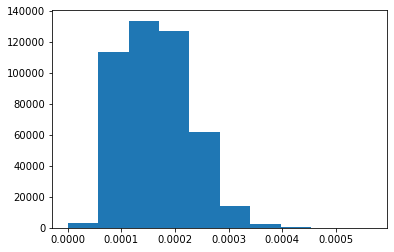

In [92]:
plt.hist(np.unique(neonatal_len_norm))

In [40]:
term_len_mats = np.squeeze(neonatal_len_norm[:,:,index_term])
prem_len_mats = np.squeeze(neonatal_len_norm[:,:,index_prem])

In [41]:
mean_len_term = np.mean(term_len_mats,axis=2)
mean_len_prem = np.mean(prem_len_mats,axis=2)

In [95]:
pearsonr(mean_prem_mat.reshape(-1), mean_term_mat.reshape(-1))

(0.986834819385679, 0.0)

In [66]:
term_len_mats.shape

(84, 84, 59)

In [101]:
term_len_mats = term_len_mats/np.max(term_len_mats,axis=(0,1))

In [102]:
prem_len_mats = prem_len_mats/np.max(prem_len_mats,axis=(0,1))

In [556]:
hcp_len = hcp_len/np.max(hcp_len,axis=(0,1))

In [320]:
np.max(term_len_mats.reshape(-1,59),axis=0).shape

(59,)

In [142]:
group_len = {}
for tier in [1,2,3]:
    tier_rois = np.where(rois_term==tier)
    connmats = term_len_mats[rois_term==tier,:,:]
    all_lengths = list()
    all_lengths.append(connmats[0,:,:].reshape(-1))
    for i in range(1,connmats.shape[0]):
        all_lengths.append(connmats[i,np.setdiff1d(tier_rois,np.arange(i))].reshape(-1))
    group_len[tier] = np.concatenate(all_lengths)
        

In [42]:
len_all_terms = np.zeros([4,len(index_term[0])])

for tier in [0,1,2,3]:
    tier_rois = np.where(rois_term==tier)
    connmats = term_len_mats[rois_term==tier,:,:]
    len_all_terms[tier,:] = np.mean(connmats,axis=(0,1))       

In [43]:
len_all_prems = np.zeros([4,len(index_prem[0])])

for tier in [0,1,2,3]:
    tier_rois = np.where(rois_prem==tier)
    connmats = prem_len_mats[rois_prem==tier,:,:]
    len_all_prems[tier,:] = np.mean(connmats,axis=(0,1))       

In [44]:
mannwhitneyu(len_all_terms[0],len_all_prems[0],alternative='two-sided'), np.mean(len_all_terms[0]), np.mean(len_all_prems[0])

(MannwhitneyuResult(statistic=1816.0, pvalue=0.04572918836008507),
 0.00016384932938465178,
 0.000168575639335552)

In [45]:
mannwhitneyu(len_all_terms[1],len_all_prems[1],alternative='two-sided'), np.mean(len_all_terms[1]), np.mean(len_all_prems[1])

(MannwhitneyuResult(statistic=1400.0, pvalue=0.00013102622170691708),
 0.00014140273618045126,
 0.00014924865392006484)

In [46]:
mannwhitneyu(len_all_terms[2],len_all_prems[2],alternative='two-sided'), np.mean(len_all_terms[2]), np.mean(len_all_prems[2])

(MannwhitneyuResult(statistic=1532.0, pvalue=0.0011748542674871723),
 0.00015514473255545102,
 0.00016223589918795212)

In [47]:
mannwhitneyu(len_all_terms[3],len_all_prems[3],alternative='two-sided'), np.mean(len_all_terms[3]), np.mean(len_all_prems[3])

(MannwhitneyuResult(statistic=2258.0, pvalue=0.9544795459785791),
 0.00014824601090536197,
 0.00014853773485124248)

Connection lenghts by type

In [48]:
triu_len_term = np.array([term_len_mats[:,:,i][np.triu_indices(84,1)] for i in range(len(index_term[0]))])

In [49]:
triu_len_prem = np.array([prem_len_mats[:,:,i][np.triu_indices(84,1)] for i in range(len(index_prem[0]))])

In [50]:
length_by_type_term = {} 
for el in np.unique(conntype):
    length_by_type_term[el] = np.squeeze(triu_len_term[:,np.where(conntype==el)])

In [51]:
length_by_type_prem = {} 
for el in np.unique(conntype):
    length_by_type_prem[el] = np.squeeze(triu_len_prem[:,np.where(conntype==el)])

In [75]:
conntype_mat = np.zeros([84,84]).astype(str)
conntype_mat[:] = ''

In [52]:
conntype_mat = np.zeros([84,84]).astype(str)
conntype_mat[:] = ''
inds = np.triu_indices(84,1)
conntype_mat[inds] = conntype
conntype_mat[inds[1],inds[0]] = conntype

In [73]:
conntype_mat[np.unravel_index(np.arange(len(conntype)), [84,84])] = conntype

In [84]:
conntype_mat = np.zeros([84,84])
inds = np.triu_indices(84,1)
conntype_mat[inds] = pd.Series(conntype).astype('category').cat.codes
conntype_mat[inds[1],inds[0]] = pd.Series(conntype).astype('category').cat.codes

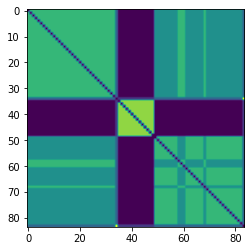

In [85]:
plt.imshow(conntype_mat.astype(float))

In [110]:
len_tier_type_term = []
len_tier_type_prem = []
for tier in range(4):
    type_mat_term = conntype_mat[np.where(rois_term==tier)[0],:]
    type_mat_term = conntype_mat[:,np.where(rois_term==tier)[0]]
    type_mat_prem = conntype_mat[np.where(rois_prem==tier)[0],:]
    type_mat_prem = conntype_mat[:,np.where(rois_prem==tier)[0]]
    tmp_term = []
    tmp_prem = []
    for el in np.unique(conntype):  
        tt = np.ravel(term_len_mats[np.where(type_mat_term==el)])
        tmp_term.append(tt[np.where(tt)])
        tp = np.ravel(prem_len_mats[np.where(type_mat_prem==el)])
        tmp_prem.append(tp[np.where(tp)])
    len_tier_type_term.append(tmp_term)
    len_tier_type_prem.append(tmp_prem)

In [53]:
len_tier_type_term = []
len_tier_type_prem = []
for tier in range(4):
    type_mat_term = conntype_mat[np.where(rois_term==tier)[0],:]
    #type_mat_term = conntype_mat[:,np.where(rois_term==tier)[0]]
    type_mat_prem = conntype_mat[np.where(rois_prem==tier)[0],:]
    #type_mat_prem = conntype_mat[:,np.where(rois_prem==tier)[0]]
    tmp_term = []
    tmp_prem = []
    for el in np.unique(conntype):  
        tt = np.ravel(term_len_mats[np.where(type_mat_term==el)])
        tmp_term.append(tt[np.where(tt)])
        tp = np.ravel(prem_len_mats[np.where(type_mat_prem==el)])
        tmp_prem.append(tp[np.where(tp)])
    len_tier_type_term.append(tmp_term)
    len_tier_type_prem.append(tmp_prem)

In [129]:
el

'intra-cereb'

In [128]:
term_len_mats.shape

(84, 84, 59)

In [125]:
len(len_tier_type_prem[1][4])

5844

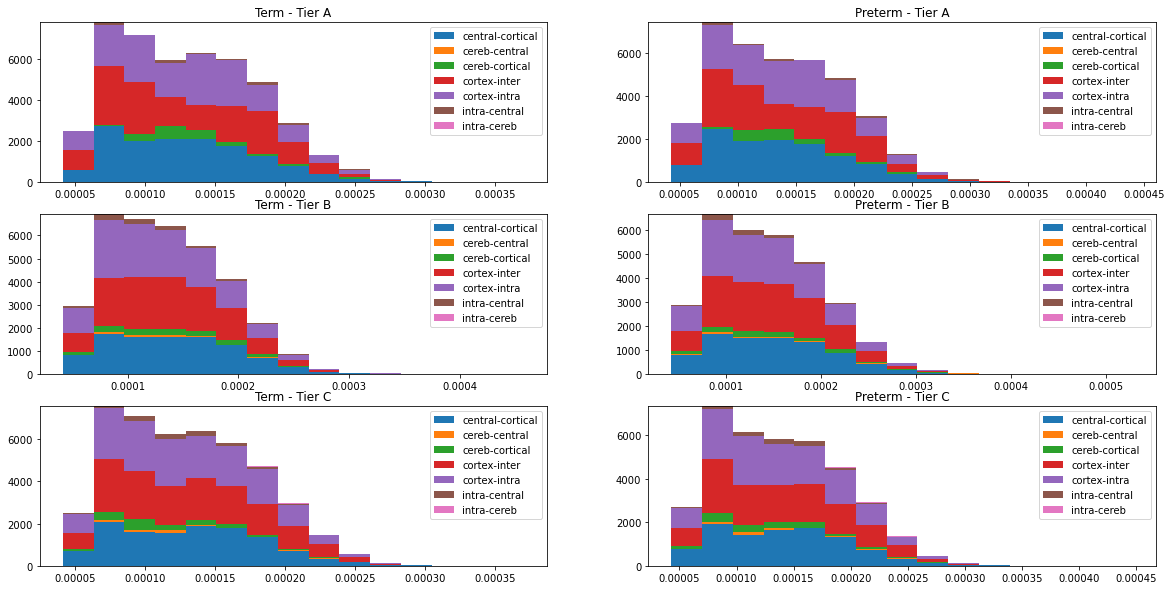

In [115]:
plt.figure(figsize=(20,10))
#fig, ax = plt.subplots(3,2,sharex=True, sharey=True)
plt.subplot(321)
plt.hist(len_tier_type_term[1], stacked=True, bins=15, density=True)
plt.title('Term - Tier A')
#plt.ylim([0,4000])
#plt.xlim([0,0.0005])
plt.legend(np.unique(conntype))
plt.subplot(322)
plt.hist(len_tier_type_prem[1], stacked=True, bins=15, density=True)
plt.title('Preterm - Tier A')
#plt.ylim([0,4000])
#plt.xlim([0,0.0005])
plt.legend(np.unique(conntype))
plt.subplot(323)
plt.hist(len_tier_type_term[2], stacked=True, bins=15, density=True)
plt.title('Term - Tier B')
#plt.ylim([0,40000])
#plt.xlim([0,0.0005])
plt.legend(np.unique(conntype))
plt.subplot(324)
plt.hist(len_tier_type_prem[2], stacked=True, bins=15, density=True)
plt.title('Preterm - Tier B')
#plt.xlim([0,0.0005])
#plt.ylim([0,40000])
plt.legend(np.unique(conntype))
plt.subplot(325)
plt.hist(len_tier_type_term[3], stacked=True, bins=15, density=True)
plt.title('Term - Tier C')
#plt.ylim([0,14000])
#plt.xlim([0,0.0005])
plt.legend(np.unique(conntype))
plt.subplot(326)
plt.hist(len_tier_type_prem[3], stacked=True, bins=15, density=True)
plt.title('Preterm - Tier C')
#plt.ylim([0,14000])
#plt.xlim([0,0.0005])
plt.legend(np.unique(conntype))
plt.savefig(path+'length_distribution.png')

In [52]:
np.unique(conntype)

array(['central-cortical', 'cereb-central', 'cereb-cortical',
       'cortex-inter', 'cortex-intra', 'intra-central', 'intra-cereb'],
      dtype='<U32')

In [57]:
parcels[parcels['tier_prem']==1]

short                    long    r    g    b  alpha    class  tier_hcp  \
index                                                                           
27     L.SFG  ctx-lh-superiorfrontal   20  220  160    255   cortex       1.0   
36      L.TH           Left-Thalamus    0  118   14    255  central       1.0   
38      L.PU            Left-Putamen  236   13  176    255  central       0.0   
43      R.TH          Right-Thalamus    0  118   14    255  central       0.0   
45      R.PU           Right-Putamen  236   13  176    255  central       0.0   
76     R.SFG  ctx-rh-superiorfrontal   20  220  160    255   cortex       1.0   

       tier_term  tier_prem  
index                        
27           1.0        1.0  
36           1.0        1.0  
38           1.0        1.0  
43           1.0        1.0  
45           1.0        1.0  
76           1.0        1.0

In [58]:
for el in len_tier_type_term[2]:
    print(len(el))

33199
859
5635
42715
41632
3116
59


In [94]:
legend_labels = ['central-cortical', 'cereb-central', 'cereb-cortical', 'inter-cortical', 'intra-cortical',  'central',   'cerebellar']

In [105]:
cm = plt.get_cmap('jet') 
[cm(i) for i in range(7)]

[(0.0, 0.0, 0.5, 1.0),
 (0.0, 0.0, 0.517825311942959, 1.0),
 (0.0, 0.0, 0.535650623885918, 1.0),
 (0.0, 0.0, 0.553475935828877, 1.0),
 (0.0, 0.0, 0.571301247771836, 1.0),
 (0.0, 0.0, 0.589126559714795, 1.0),
 (0.0, 0.0, 0.606951871657754, 1.0)]

In [110]:
plt.figure(figsize=(15,12))
#fig, ax = plt.subplots(3,2,sharex=True, sharey=True)
plt.subplot(321)
plt.hist(len_tier_type_term[1], stacked=True, bins=15, density=True, color= ['royalblue', 'limegreen', 'cornflowerblue', 'grey', 'darkorange', 'gold', 'darkblue'])
plt.title('Term - Tier A')
#plt.ylim([0,4000])
plt.xlim([0,0.0005])
plt.legend(legend_labels)
plt.subplot(322)
plt.hist(len_tier_type_prem[1], stacked=True, bins=15, density=True, color= ['royalblue', 'limegreen', 'cornflowerblue', 'grey', 'darkorange', 'gold', 'darkblue'])
plt.title('Preterm - Tier A')
#plt.ylim([0,4000])
plt.xlim([0,0.0005])
plt.legend(legend_labels)
plt.subplot(323)
plt.hist(len_tier_type_term[2], stacked=True, bins=15, density=True, color= ['royalblue', 'limegreen', 'cornflowerblue', 'grey', 'darkorange', 'gold', 'darkblue'])
plt.title('Term - Tier B')
#plt.ylim([0,40000])
plt.xlim([0,0.0005])
plt.legend(legend_labels)
plt.subplot(324)
plt.hist(len_tier_type_prem[2], stacked=True, bins=15, density=True, color= ['royalblue', 'limegreen', 'cornflowerblue', 'grey', 'darkorange', 'gold', 'darkblue'])
plt.title('Preterm - Tier B')
plt.xlim([0,0.0005])
#plt.ylim([0,40000])
plt.legend(legend_labels)
plt.subplot(325)
plt.hist(len_tier_type_term[3], stacked=True, bins=15, density=True, color= ['royalblue', 'limegreen', 'cornflowerblue', 'grey', 'darkorange', 'gold', 'darkblue'])
plt.title('Term - Tier C')
#plt.ylim([0,14000])
plt.xlim([0,0.0005])
plt.legend(legend_labels)
plt.subplot(326)
plt.hist(len_tier_type_prem[3], stacked=True, bins=15, density=True, color= ['royalblue', 'limegreen', 'cornflowerblue', 'grey', 'darkorange', 'gold', 'darkblue'])
plt.title('Preterm - Tier C')
#plt.ylim([0,14000])
plt.xlim([0,0.0005])
plt.legend(legend_labels)
plt.savefig(path+'length_distribution.png', dpi=300)

In [113]:
for el in np.unique(conntype):
    print(el, 'term', length_by_type_term[el].mean(), '+/-',length_by_type_term[el].std())
    print(el, 'prem', length_by_type_prem[el].mean(), '+/-',length_by_type_prem[el].std())    

central-cortical term 0.00014092821633823893 +/- 4.996276540407543e-05
central-cortical prem 0.00014827065456569233 +/- 5.500968670427211e-05
cereb-central term 0.00014230349653772317 +/- 2.0878633262933247e-05
cereb-central prem 0.00014900344192531588 +/- 2.370981098128672e-05
cereb-cortical term 0.0002014834270777638 +/- 4.8106132583706394e-05
cereb-cortical prem 0.00020795243419723886 +/- 5.430535909645123e-05
cortex-inter term 0.00018243172737680564 +/- 7.605044230787656e-05
cortex-inter prem 0.00018496358422454806 +/- 8.765344506261855e-05
cortex-intra term 0.00013805212907409053 +/- 5.8956998759483e-05
cortex-intra prem 0.00014445747463247716 +/- 6.440177990504203e-05
intra-central term 9.020171806108837e-05 +/- 2.5801957276930114e-05
intra-central prem 9.678102120021008e-05 +/- 2.8093643050299458e-05
intra-cereb term 0.00014183245268660992 +/- 1.0451488697224657e-05
intra-cereb prem 0.0001470371929718522 +/- 1.082688411490327e-05


In [68]:
for j in range(4):
    print('Tier',j)
    for i in range(len(np.unique(conntype))):
        try:
            print(len_tier_type_term[j][i].shape,len_tier_type_term[j][i].shape)
            print(np.unique(conntype)[i], mannwhitneyu(len_tier_type_term[j][i],len_tier_type_term[j][i], alternative='two-sided'))
        except:
            continue

Tier 0
(3228,) (3228,)
central-cortical MannwhitneyuResult(statistic=5209992.0, pvalue=0.9999946721525028)
(0,) (0,)
cereb-central MannwhitneyuResult(statistic=0.0, pvalue=0.0)
(472,) (472,)
cereb-cortical MannwhitneyuResult(statistic=111392.0, pvalue=0.9999047547083589)
(7286,) (7286,)
cortex-inter MannwhitneyuResult(statistic=26542898.0, pvalue=0.9999984287798402)
(6984,) (6984,)
cortex-intra MannwhitneyuResult(statistic=24388128.0, pvalue=0.9999983257750756)
(0,) (0,)
intra-central MannwhitneyuResult(statistic=0.0, pvalue=0.0)
(0,) (0,)
intra-cereb MannwhitneyuResult(statistic=0.0, pvalue=0.0)
Tier 1
(15976,) (15976,)
central-cortical MannwhitneyuResult(statistic=127616288.0, pvalue=0.9999995160763825)
(471,) (471,)
cereb-central MannwhitneyuResult(statistic=110920.5, pvalue=0.9999044513251117)
(236,) (236,)
cereb-cortical MannwhitneyuResult(statistic=27848.0, pvalue=0.9997307467020926)
(3470,) (3470,)
cortex-inter MannwhitneyuResult(statistic=6020450.0, pvalue=0.999995219644385)
(3

(array([134., 413., 366., 512., 394., 462., 206., 200., 255., 345., 443.,
        471., 381., 300., 216., 192., 219., 193., 201., 168., 115.,  56.,
         36.,  35.,  22.,  15.,   1.,   4.,   0.,   2.]),
 array([0.15253711, 0.17832021, 0.20410332, 0.22988643, 0.25566954,
        0.28145264, 0.30723575, 0.33301886, 0.35880197, 0.38458508,
        0.41036818, 0.43615129, 0.4619344 , 0.48771751, 0.51350061,
        0.53928372, 0.56506683, 0.59084994, 0.61663304, 0.64241615,
        0.66819926, 0.69398237, 0.71976547, 0.74554858, 0.77133169,
        0.7971148 , 0.8228979 , 0.84868101, 0.87446412, 0.90024723,
        0.92603034]),
 <a list of 30 Patch objects>)

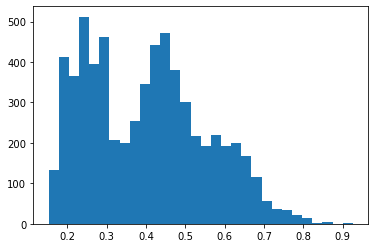

In [345]:
plt.hist(group_len[1][np.where(group_len[1])], bins=30)

In [346]:
plt.hist(group_len[2][np.where(group_len[2])], bins=30)

(array([1.595e+03, 6.390e+03, 7.945e+03, 8.077e+03, 7.823e+03, 7.022e+03,
        7.589e+03, 8.818e+03, 8.027e+03, 7.398e+03, 7.428e+03, 7.623e+03,
        7.037e+03, 5.892e+03, 5.048e+03, 4.569e+03, 4.028e+03, 2.976e+03,
        2.099e+03, 1.287e+03, 7.290e+02, 3.980e+02, 2.430e+02, 1.250e+02,
        5.700e+01, 5.000e+01, 2.400e+01, 1.300e+01, 5.000e+00, 4.000e+00]),
 array([0.12793294, 0.15700184, 0.18607074, 0.21513965, 0.24420855,
        0.27327745, 0.30234635, 0.33141525, 0.36048416, 0.38955306,
        0.41862196, 0.44769086, 0.47675976, 0.50582867, 0.53489757,
        0.56396647, 0.59303537, 0.62210427, 0.65117318, 0.68024208,
        0.70931098, 0.73837988, 0.76744878, 0.79651769, 0.82558659,
        0.85465549, 0.88372439, 0.91279329, 0.9418622 , 0.9709311 ,
        1.        ]),
 <a list of 30 Patch objects>)

In [347]:
plt.hist(group_len[3][np.where(group_len[3])], bins=30)

(array([ 319.,  573.,  529.,  626., 1184., 1145., 1326., 1363., 1131.,
         993., 1330., 1178., 1133., 1054.,  836.,  808.,  697.,  513.,
         436.,  317.,  236.,  176.,  113.,   93.,   64.,   45.,   47.,
          36.,   19.,   36.]),
 array([0.10471808, 0.13456081, 0.16440354, 0.19424627, 0.224089  ,
        0.25393173, 0.28377446, 0.31361719, 0.34345992, 0.37330265,
        0.40314538, 0.43298811, 0.46283085, 0.49267358, 0.52251631,
        0.55235904, 0.58220177, 0.6120445 , 0.64188723, 0.67172996,
        0.70157269, 0.73141542, 0.76125815, 0.79110088, 0.82094362,
        0.85078635, 0.88062908, 0.91047181, 0.94031454, 0.97015727,
        1.        ]),
 <a list of 30 Patch objects>)

In [54]:
group_len_term = {}
for tier in [1,2,3]:
    tier_rois = np.where(rois_term==tier)
    connmats = term_len_mats[rois_term==tier,:,:]
    all_lengths = list()
    all_lengths.append(connmats[0,:,:].reshape(-1))
    for i in range(1,connmats.shape[0]):
        all_lengths.append(connmats[i,np.setdiff1d(tier_rois,np.arange(i))].reshape(-1))
    group_len_term[tier] = np.concatenate(all_lengths)
        

In [55]:
group_len_prem = {}
for tier in [1,2,3]:
    tier_rois = np.where(rois_prem==tier)
    connmats = prem_len_mats[rois_prem==tier,:,:]
    all_lengths = list()
    all_lengths.append(connmats[0,:,:].reshape(-1))
    for i in range(1,connmats.shape[0]):
        all_lengths.append(connmats[i,np.setdiff1d(tier_rois,np.arange(i))].reshape(-1))
    group_len_prem[tier] = np.concatenate(all_lengths)
        

In [558]:
group_len_hcp = {}
for tier in [1,2,3]:
    tier_rois = np.where(rois_hcp==tier)
    connmats = hcp_len[rois_hcp==tier,:,:]
    all_lengths = list()
    all_lengths.append(connmats[0,:,:].reshape(-1))
    for i in range(1,connmats.shape[0]):
        all_lengths.append(connmats[i,np.setdiff1d(tier_rois,np.arange(i))].reshape(-1))
    group_len_hcp[tier] = np.concatenate(all_lengths)
        

In [560]:
plt.hist?

In [563]:
np.min(group_len_hcp[3][np.where(group_len_hcp[3])])

0.08968567652354503

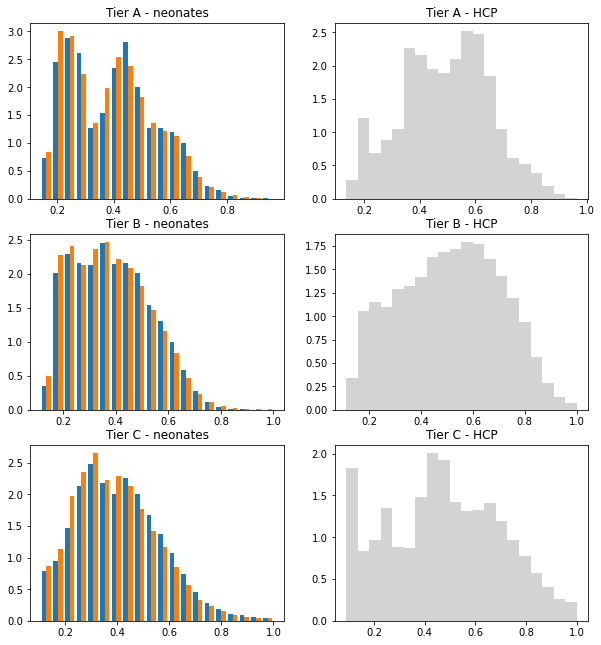

In [562]:
plt.figure(figsize=(10,11))
plt.subplot(3,2,1)
plt.hist((group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])]),bins=20, density=True)
plt.title('Tier A - neonates')
plt.subplot(3,2,2)
plt.hist(group_len_hcp[1][np.where(group_len_hcp[1])],bins=20, density=True, color='lightgray')
plt.title('Tier A - HCP')
plt.subplot(323)
plt.hist((group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])]),bins=20, density=True)
plt.title('Tier B - neonates')
plt.subplot(324)
plt.hist(group_len_hcp[2][np.where(group_len_hcp[2])],bins=20, density=True, color='lightgray')
plt.title('Tier B - HCP')
plt.subplot(325)
plt.hist((group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])]),bins=20, density=True)
plt.title('Tier C - neonates')
plt.subplot(326)
plt.hist(group_len_hcp[3][np.where(group_len_hcp[3])],bins=20, density=True, color='lightgray')
plt.title('Tier C - HCP')
plt.show()

(array([10877.27949602, 19579.10309284, 34807.29438728, 28280.92668966,
        39158.20618569, 13052.73539523,  8701.82359682,  6526.36769761,
         2175.4558992 ,  4350.91179841]),
 array([0.00012655, 0.00013252, 0.00013849, 0.00014446, 0.00015043,
        0.00015639, 0.00016236, 0.00016833, 0.0001743 , 0.00018027,
        0.00018624]),
 <a list of 10 Patch objects>)

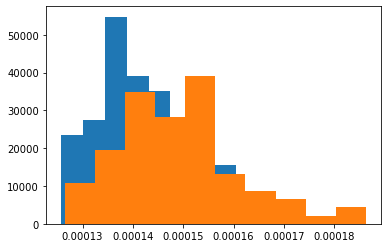

In [154]:
plt.hist(len_all_terms[1][np.where(len_all_terms[1])],density=True)
plt.hist(len_all_prems[1][np.where(len_all_prems[1])],density=True)


In [170]:
len_all_terms[2].shape

(59,)

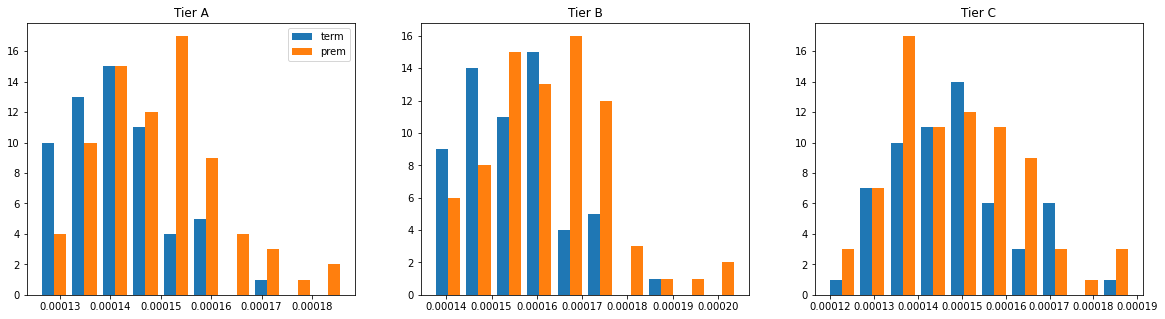

In [167]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist((len_all_terms[1][np.where(len_all_terms[1])],len_all_prems[1][np.where(len_all_prems[1])]),density=False)
plt.title('Tier A')
plt.legend(['term', 'prem'])
plt.subplot(1,3,2)
plt.hist((len_all_terms[2][np.where(len_all_terms[2])],len_all_prems[2][np.where(len_all_prems[2])]),density=False)
plt.title('Tier B')
plt.subplot(1,3,3)
plt.hist((len_all_terms[3][np.where(len_all_terms[3])],len_all_prems[3][np.where(len_all_prems[3])]),density=False)
plt.title('Tier C')
plt.show()

In [180]:
group_len[2].shape

(114991,)

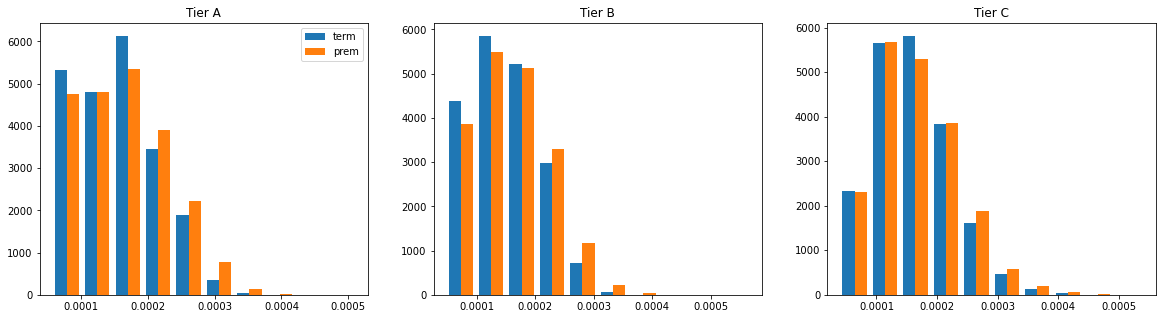

In [181]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist((group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])]),density=True)
plt.title('Tier A')
plt.legend(['term', 'prem'])
plt.subplot(1,3,2)
plt.hist((group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])]),density=True)
plt.title('Tier B')
plt.subplot(1,3,3)
plt.hist((group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])]),density=True)
plt.title('Tier C')
plt.show()

In [355]:
mannwhitneyu(group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])], alternative='greater'),ranksums(group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])]), ttest_ind(group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])], equal_var=False), np.mean(group_len[1][np.where(group_len[1])]), np.mean(group_len_prem[1][np.where(group_len_prem[1])])

(MannwhitneyuResult(statistic=27548614.0, pvalue=5.589556405082823e-07),
 RanksumsResult(statistic=4.869660736098887, pvalue=1.1179001707924433e-06),
 Ttest_indResult(statistic=4.528716172835008, pvalue=5.9847203516158364e-06),
 0.4011472980121898,
 0.3897855682264852)

In [356]:
mannwhitneyu(group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])], alternative='greater'),ranksums(group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])]), ttest_ind(group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])], equal_var=False), np.mean(group_len[2][np.where(group_len[2])]), np.mean(group_len_prem[2][np.where(group_len_prem[2])])

(MannwhitneyuResult(statistic=9516340100.0, pvalue=2.0006877590819315e-101),
 RanksumsResult(statistic=21.34879331412889, pvalue=4.001373425454839e-101),
 Ttest_indResult(statistic=20.823498503364057, pvalue=3.1843361048909483e-96),
 0.38934613186737416,
 0.3776506816713361)

In [357]:
mannwhitneyu(group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])], alternative='greater'),ranksums(group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])]), ttest_ind(group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])], equal_var=False), np.mean(group_len[3][np.where(group_len[3])]), np.mean(group_len_prem[3][np.where(group_len_prem[3])])

(MannwhitneyuResult(statistic=224107729.5, pvalue=1.0805038946567629e-46),
 RanksumsResult(statistic=14.30086729087605, pvalue=2.1609952084521223e-46),
 Ttest_indResult(statistic=13.963975266576432, pvalue=3.3102051223897473e-44),
 0.4124022590910535,
 0.3901157780264737)

Comparing tiers

all

In [363]:
all_group_len[1].shape

(14636,)

In [111]:
all_group_len = {}
for tier in [1,2,3]:
    all_group_len[tier] = np.concatenate((group_len[tier][np.where(group_len[tier])],group_len_prem[tier][np.where(group_len_prem[tier])]))

NameError: name 'group_len' is not defined

In [370]:
mannwhitneyu(all_group_len[1],all_group_len[2],alternative='two-sided'), ranksums(all_group_len[1],all_group_len[2]), ttest_ind(all_group_len[1],all_group_len[2], equal_var=False), np.mean(all_group_len[1]), np.mean(all_group_len[2])

(MannwhitneyuResult(statistic=2068357463.0, pvalue=1.5698181283194945e-17),
 RanksumsResult(statistic=8.521881662041023, pvalue=1.5698174325425738e-17),
 Ttest_indResult(statistic=9.328884060723206, pvalue=1.2057546083070422e-20),
 0.3947204217552993,
 0.3828372744948643)

In [369]:
mannwhitneyu(all_group_len[1],all_group_len[3],alternative='two-sided'), ranksums(all_group_len[1],all_group_len[3]), ttest_ind(all_group_len[1],all_group_len[3], equal_var=False), np.mean(all_group_len[1]), np.mean(all_group_len[3])

(MannwhitneyuResult(statistic=294749675.0, pvalue=0.004612184768088119),
 RanksumsResult(statistic=-2.8329416472176963, pvalue=0.004612180455236702),
 Ttest_indResult(statistic=-3.6571322301476155, pvalue=0.0002555308515145064),
 0.3947204217552993,
 0.400112617047573)

In [368]:
mannwhitneyu(all_group_len[2],all_group_len[3],alternative='two-sided'), ranksums(all_group_len[2],all_group_len[3]), ttest_ind(all_group_len[2],all_group_len[3], equal_var=False), np.mean(all_group_len[2]), np.mean(all_group_len[3])

(MannwhitneyuResult(statistic=5260814911.0, pvalue=1.7138232739735891e-65),
 RanksumsResult(statistic=-17.09160797016654, pvalue=1.7138224147565849e-65),
 Ttest_indResult(statistic=-20.5433323101832, pvalue=2.092773128939204e-93),
 0.3828372744948643,
 0.400112617047573)

term

In [146]:
mannwhitneyu(group_len[1][np.where(group_len[1])],group_len[3][np.where(group_len[3])], alternative='two-sided'),ranksums(group_len[1][np.where(group_len[1])],group_len[3][np.where(group_len[3])]), ttest_ind(group_len[1][np.where(group_len[1])],group_len[3][np.where(group_len[3])], equal_var=False), np.mean(group_len[1][np.where(group_len[1])]), np.mean(group_len[3][np.where(group_len[3])])

(MannwhitneyuResult(statistic=64990242.5, pvalue=5.564187440690682e-09),
 RanksumsResult(statistic=-5.829356320636965, pvalue=5.564158053049519e-09),
 Ttest_indResult(statistic=-6.520115689468983, pvalue=7.332022628050661e-11),
 0.00015543742761603942,
 0.0001610392255106115)

In [147]:
mannwhitneyu(group_len[1][np.where(group_len[1])],group_len[2][np.where(group_len[2])], alternative='two-sided'),ranksums(group_len[1][np.where(group_len[1])],group_len[2][np.where(group_len[2])]), ttest_ind(group_len[1][np.where(group_len[1])],group_len[2][np.where(group_len[2])], equal_var=False), np.mean(group_len[1][np.where(group_len[1])]), np.mean(group_len[2][np.where(group_len[2])])

(MannwhitneyuResult(statistic=357957027.5, pvalue=3.7008412997406367e-10),
 RanksumsResult(statistic=6.2661500811982735, pvalue=3.7008366480754265e-10),
 Ttest_indResult(statistic=6.852891247086624, pvalue=7.847076225266537e-12),
 0.00015543742761603942,
 0.00015021389336397663)

In [148]:
mannwhitneyu(group_len[3][np.where(group_len[3])],group_len[2][np.where(group_len[2])], alternative='two-sided'),ranksums(group_len[3][np.where(group_len[3])],group_len[2][np.where(group_len[2])]), ttest_ind(group_len[3][np.where(group_len[3])],group_len[2][np.where(group_len[2])], equal_var=False), np.mean(group_len[3][np.where(group_len[3])]), np.mean(group_len[2][np.where(group_len[2])])

(MannwhitneyuResult(statistic=1261981959.5, pvalue=3.4194414957420656e-101),
 RanksumsResult(statistic=21.35613766902071, pvalue=3.419434233328012e-101),
 Ttest_indResult(statistic=23.20687518827401, pvalue=4.7022466000790835e-118),
 0.0001610392255106115,
 0.00015021389336397663)

preterm

In [149]:
mannwhitneyu(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[3][np.where(group_len_prem[3])], alternative='two-sided'),ranksums(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[3][np.where(group_len_prem[3])]), ttest_ind(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[3][np.where(group_len_prem[3])], equal_var=False), np.mean(group_len_prem[1][np.where(group_len_prem[1])]), np.mean(group_len_prem[3][np.where(group_len_prem[3])])

(MannwhitneyuResult(statistic=100175750.5, pvalue=0.7320902005165388),
 RanksumsResult(statistic=-0.3423471038995689, pvalue=0.7320896909440052),
 Ttest_indResult(statistic=-0.7975050153816661, pvalue=0.4251704134691707),
 0.00016423338993462787,
 0.00016489217735342638)

In [150]:
mannwhitneyu(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[2][np.where(group_len_prem[2])], alternative='two-sided'),ranksums(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[2][np.where(group_len_prem[2])]), ttest_ind(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[2][np.where(group_len_prem[2])], equal_var=False), np.mean(group_len_prem[1][np.where(group_len_prem[1])]), np.mean(group_len_prem[2][np.where(group_len_prem[2])])

(MannwhitneyuResult(statistic=652082298.5, pvalue=3.1369631848753817e-11),
 RanksumsResult(statistic=6.6399939361450295, pvalue=3.136960576668829e-11),
 Ttest_indResult(statistic=7.131471828943262, pvalue=1.0683755542441203e-12),
 0.00016423338993462787,
 0.00015908886739763174)

In [152]:
mannwhitneyu(group_len_prem[3][np.where(group_len_prem[3])],group_len_prem[2][np.where(group_len_prem[2])], alternative='two-sided'),ranksums(group_len_prem[3][np.where(group_len_prem[3])],group_len_prem[2][np.where(group_len_prem[2])]), ttest_ind(group_len_prem[3][np.where(group_len_prem[3])],group_len_prem[2][np.where(group_len_prem[2])], equal_var=False), np.mean(group_len_prem[3][np.where(group_len_prem[3])]), np.mean(group_len_prem[2][np.where(group_len_prem[2])])

(MannwhitneyuResult(statistic=1907395674.5, pvalue=3.779646155524927e-25),
 RanksumsResult(statistic=10.359746009972941, pvalue=3.7796434652348154e-25),
 Ttest_indResult(statistic=12.576398427116278, pvalue=3.485340338169321e-36),
 0.00016489217735342638,
 0.00015908886739763174)

Comparing network metrics

In [257]:
T = sio.loadmat('T')['T']
Eloc = sio.loadmat('Eloc')['Eloc_mean']
Eglob = sio.loadmat('Eglob')['Eglob']
CPL = sio.loadmat('CPL')['L']
CC = sio.loadmat('CC')['C_mean']

In [282]:
ranksums(T[index_term], T[index_prem]), ttest_ind(T[index_term], T[index_prem], equal_var=False), np.mean(T[index_term]), np.mean(T[index_prem])

(RanksumsResult(statistic=-4.568788516634473, pvalue=4.905514489430833e-06),
 Ttest_indResult(statistic=array([-4.84648361]), pvalue=array([3.42905059e-06])),
 0.5846075057769746,
 0.593232971499556)

In [284]:
ranksums(Eloc[index_term], Eloc[index_prem]), ttest_ind(Eloc[index_term], Eloc[index_prem], equal_var=False), np.mean(Eloc[index_term]), np.mean(Eloc[index_prem])

(RanksumsResult(statistic=-1.2843542922783115, pvalue=0.19901801816949294),
 Ttest_indResult(statistic=array([-0.56688327]), pvalue=array([0.57176215])),
 0.8436566186565561,
 0.8442560304266037)

In [285]:
ranksums(Eglob[index_term], Eglob[index_prem]), ttest_ind(Eglob[index_term], Eglob[index_prem], equal_var=False), np.mean(Eglob[index_term]), np.mean(Eglob[index_prem])

(RanksumsResult(statistic=3.703770412091473, pvalue=0.0002124185207045319),
 Ttest_indResult(statistic=array([4.11286764]), pvalue=array([7.02348334e-05])),
 0.6285393389538815,
 0.62554640330028)

In [286]:
ranksums(CPL[index_term], CPL[index_prem]), ttest_ind(CPL[index_term], CPL[index_prem], equal_var=False), np.mean(CPL[index_term]), np.mean(CPL[index_prem])

(RanksumsResult(statistic=-3.084645778890646, pvalue=0.0020379470951426),
 Ttest_indResult(statistic=array([-3.3025615]), pvalue=array([0.00125397])),
 1.8267562661915597,
 1.8367340982050697)

In [287]:
ranksums(CC[index_term], CC[index_prem]), ttest_ind(CC[index_term], CC[index_prem], equal_var=False), np.mean(CC[index_term]), np.mean(CC[index_prem])

(RanksumsResult(statistic=-1.6444125896007784, pvalue=0.10009100634215189),
 Ttest_indResult(statistic=array([-1.75798752]), pvalue=array([0.08103537])),
 0.6893489714785462,
 0.6922971318099383)

In [271]:
?ttest_ind

(array([[ 0.,  0.,  0.,  0.,  1.,  0., 10., 17., 22.,  9.],
        [ 2.,  2.,  1.,  0.,  3.,  6., 17., 30., 13.,  3.]]),
 array([0.60508701, 0.60802974, 0.61097246, 0.61391518, 0.61685791,
        0.61980063, 0.62274335, 0.62568608, 0.6286288 , 0.63157152,
        0.63451425]),
 <a list of 2 Lists of Patches objects>)

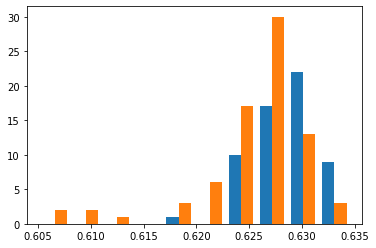

In [293]:
plt.hist((Eglob[index_term],Eglob[index_prem]))

Extracting tiers from connectomes

In [5]:
hcp_mats = sio.loadmat(path+'ST_HCP94_bin.mat')['ST_bin']

In [14]:
hcp_mats.shape

(84, 84, 94)

In [ ]:
node_degrees = np.array([hcp_mats[:,:,i].sum(axis=1) for i in range(hcp_mats.shape[2])])

(array([  6.,  58., 176., 347., 408., 364., 323., 393., 442., 610., 572.,
        602., 530., 486., 412., 335., 244., 226., 209., 141.,  96., 101.,
        133., 155., 183., 181., 111.,  40.,   9.,   3.]),
 array([ 1.        ,  2.96666667,  4.93333333,  6.9       ,  8.86666667,
        10.83333333, 12.8       , 14.76666667, 16.73333333, 18.7       ,
        20.66666667, 22.63333333, 24.6       , 26.56666667, 28.53333333,
        30.5       , 32.46666667, 34.43333333, 36.4       , 38.36666667,
        40.33333333, 42.3       , 44.26666667, 46.23333333, 48.2       ,
        50.16666667, 52.13333333, 54.1       , 56.06666667, 58.03333333,
        60.        ]),
 <a list of 30 Patch objects>)

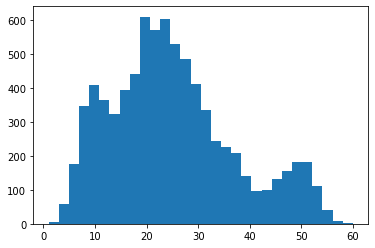

In [32]:
plt.hist(node_degrees.reshape(-1), bins=30)